In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


FER2013_YOLU = '/kaggle/input/fer2013/fer2013.csv' 

try:
    data = pd.read_csv(FER2013_YOLU) 
except FileNotFoundError:
    print("HATA: fer2013.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    raise

# Piksel ve Etiketleri Ayırma
pixels = data['pixels'].apply(lambda x: np.array(x.split(), 'float32'))
X = np.stack(pixels.values).reshape(-1, 48, 48, 1) / 255.0 # Görüntü verisi
y = pd.get_dummies(data['emotion']).values # One-Hot Etiketler


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Test verileri (X_test, y_test) başarıyla oluşturuldu.")

Test verileri (X_test, y_test) başarıyla oluşturuldu.



Bu kodun temel amacı, ham veri setini (FER2013) alıp, sinir ağınıb (CNN) direkt olarak eğitime başlayabileceği standartlaştırılmış ve ayrılmış eğitim, doğrulama ve test setlerine dönüştürmektir.

In [26]:
from tensorflow.keras.models import load_model


MODEL_YOLU = '/kaggle/input/insan-duygu-model/Duygu_Modeli.h5' 

try:
    # Modeli yükleme
    yuklenen_model = load_model(MODEL_YOLU)
    print(f"\nModel ('{MODEL_YOLU}') başarıyla yüklendi! Değerlendirmeye hazır.")
except Exception as e:
    print(f"\nHATA: Model yüklenemedi. Dosya yolunuzu kontrol edin.")
    print(f"Hata Mesajı: {e}")
    
    raise


Model ('/kaggle/input/insan-duygu-model/Duygu_Modeli.h5') başarıyla yüklendi! Değerlendirmeye hazır.


Bu kodun temel görevi, daha önce eğitilip kaydedilmiş olan "Duygu Modeli" adlı derin öğrenme modelini Kaggle'daki depolama alanından alıp, aktif çalışma ortamına yüklemektir.

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


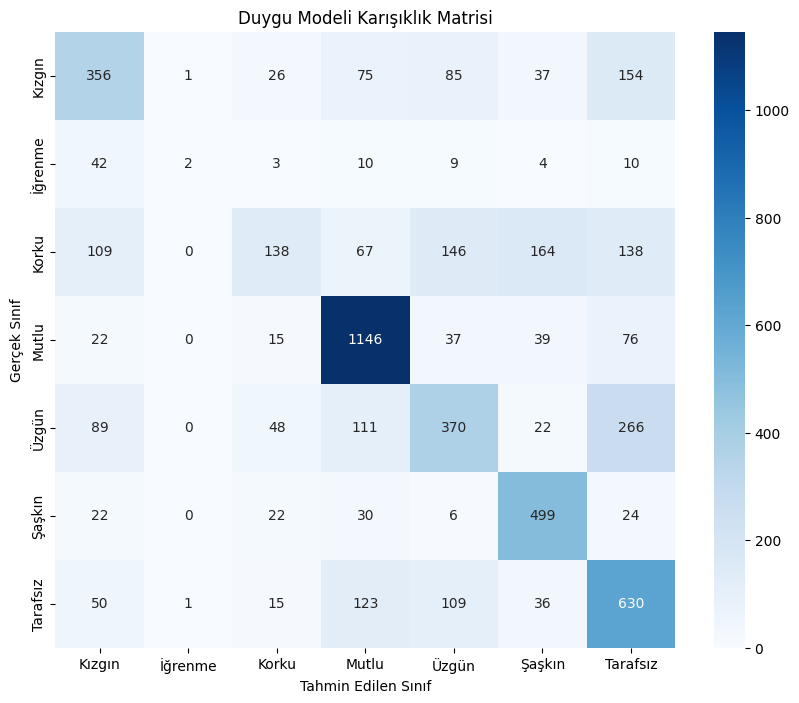


SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

      Kızgın       0.52      0.49      0.50       734
     İğrenme       0.50      0.03      0.05        80
       Korku       0.52      0.18      0.27       762
       Mutlu       0.73      0.86      0.79      1335
       Üzgün       0.49      0.41      0.44       906
      Şaşkın       0.62      0.83      0.71       603
    Tarafsız       0.49      0.65      0.56       964

    accuracy                           0.58      5384
   macro avg       0.55      0.49      0.47      5384
weighted avg       0.57      0.58      0.56      5384



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Duygu etiketleri 
emotion_labels = ['Kızgın', 'İğrenme', 'Korku', 'Mutlu', 'Üzgün', 'Şaşkın', 'Tarafsız']

# --- Tahmin ve Değerlendirme ---

# Hata kontrolü 
try:
    
    y_pred = yuklenen_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)        # Tahmin edilen sınıf sayıları (0-6)
    y_true_classes = np.argmax(y_test, axis=1)        # Gerçek sınıf sayıları (0-6)

except NameError:
    print("HATA: 'X_test' veya 'y_test' tanımlı değil. Lütfen veri yükleme ve ayırma adımlarını tekrar çalıştırın.")
    raise 

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=emotion_labels,
    yticklabels=emotion_labels
)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Duygu Modeli Karışıklık Matrisi')
plt.show()

print("\n" + "="*50)
print("SINIFLANDIRMA RAPORU")
print("="*50)
print(classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels))

Bu kodun temel amacı, daha önce yüklediğimiz Duygu Modeli'ni kullanarak test sonuçlarını sayısal ve görsel olarak sunmaktır.

In [28]:
import cv2 # Görüntü işleme için kullanılır (Örneğin OpenCV kütüphanesi)
import numpy as np

# --- AYARLAR ---
FOTOGRAF_YOLU = '/kaggle/input/face123/face1.jpg' 

IMG_WIDTH = 48
IMG_HEIGHT = 48

# --- ÖN İŞLEME FONKSİYONU ---
def fotoyu_on_isle(yuz_fotografi):
    # Gri tonlamaya çevirme
    gri_foto = cv2.cvtColor(yuz_fotografi, cv2.COLOR_BGR2GRAY)
    
    # Yeniden boyutlandırma
    yeniden_boyutlu = cv2.resize(gri_foto, (IMG_WIDTH, IMG_HEIGHT))
    
    # Normalleştirme (0-255'ten 0.0-1.0'a)
    normalize_edilmis = yeniden_boyutlu / 255.0
    
    girdi_verisi = np.expand_dims(np.expand_dims(normalize_edilmis, axis=0), axis=-1)
    
    return girdi_verisi

# --- YÜZ TESPİTİ 
try:
    orijinal_foto = cv2.imread(FOTOGRAF_YOLU)
    if orijinal_foto is None:
        raise FileNotFoundError
        
    islenmis_girdi = fotoyu_on_isle(orijinal_foto)
    print("Fotoğraf başarıyla yüklendi ve ön işlendi.")

except FileNotFoundError:
    print("HATA: Fotoğraf dosyası bulunamadı. Lütfen 'test_foto.jpg' yolunu kontrol edin.")
    raise

Fotoğraf başarıyla yüklendi ve ön işlendi.


Bu kodun temel amacı, modelin daha önce hiç görmediği bir görüntüyü alıp, modelin eğitildiği tam formata önüştürmektir.

In [29]:
# Duygu etiketleri 
emotion_labels = ['Kızgın', 'İğrenme', 'Korku', 'Mutlu', 'Üzgün', 'Şaşkın', 'Tarafsız']


tahminler = yuklenen_model.predict(islenmis_girdi)

tahmin_indexi = np.argmax(tahminler)

tahmin_yuzdesi = np.max(tahminler) * 100

tahmin_edilen_duygu = emotion_labels[tahmin_indexi]

print("-" * 35)
print("FOTOĞRAF ANALİZ SONUCU")
print("-" * 35)
print(f"Tahmin Edilen Duygu: {tahmin_edilen_duygu}")
print(f"Olasılık Yüzdesi: {tahmin_yuzdesi:.2f}%")
print("-" * 35)


print("\nTüm Duygular İçin Olasılık Dağılımı:")
for label, prob in zip(emotion_labels, tahminler[0]):
    print(f"  {label:<10}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
-----------------------------------
FOTOĞRAF ANALİZ SONUCU
-----------------------------------
Tahmin Edilen Duygu: Kızgın
Olasılık Yüzdesi: 44.03%
-----------------------------------

Tüm Duygular İçin Olasılık Dağılımı:
  Kızgın    : 44.03%
  İğrenme   : 1.97%
  Korku     : 12.86%
  Mutlu     : 20.09%
  Üzgün     : 11.54%
  Şaşkın    : 2.05%
  Tarafsız  : 7.46%


Bu kod, önceki adımda hazırlanan işlenmiş girdi üzerinde eğitilmiş derin öğrenme modelini çalıştırarak duygu tahmini yapar ve sonuçları kullanıcı dostu bir şekilde sunar.



In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 

LAST_CONV_LAYER_NAME = 'conv2d_2' 


def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    """
    Model yükleme sonrası katman zincirleme hatalarını çözen Grad-CAM fonksiyonu.
    """
    layer_names = [layer.name for layer in model.layers]
    
    # 1. Gradyan Modelini Oluşturma (Son evrişim katmanına kadar)
    last_conv_model = tf.keras.models.Model(
        model.inputs, model.get_layer(last_conv_layer_name).output
    )

    # 2. Sınıflandırma Modelini Oluşturma (Son evrişimden sonuca kadar)
    conv_layer_index = layer_names.index(last_conv_layer_name)
    classifier_input = tf.keras.Input(shape=last_conv_model.output.shape[1:])
    x = classifier_input
    
    for layer in model.layers[conv_layer_index + 1:]: 
         x = layer(x)

    classifier_model = tf.keras.models.Model(classifier_input, x)
    
    # 3. Grad-CAM Hesabı
    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_model(img_array)
        tape.watch(last_conv_layer_output) 
        
        preds = classifier_model(last_conv_layer_output)
        
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # 4. Gradyanları Hesaplama ve Isı Haritası Oluşturma
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    
    return heatmap.numpy(), preds.numpy(), pred_index.numpy()

Bu fonksiyon , eğitilmiş bir CNN modelinin neden belirli bir tahmin yaptığını görselleştirmek için kullanılır. Modelin kararını verirken görüntünün hangi bölgelerine en çok odaklandığını gösteren bir ısı haritası oluşturur.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 48, 48, 1))
  warnings.warn(msg)


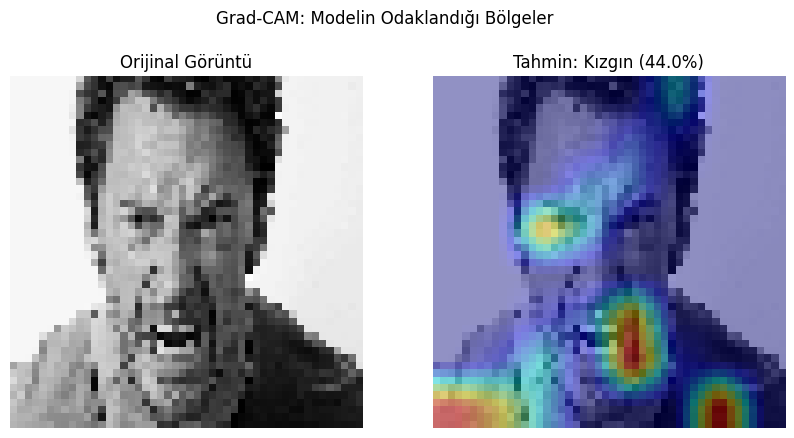

In [31]:
# --- GRAD-CAM HESAPLAMA ---
try:
    heatmap, predictions, predicted_index = make_gradcam_heatmap(
        islenmis_girdi, yuklenen_model, LAST_CONV_LAYER_NAME
    )
except Exception as e:
    print(f"HATA: Grad-CAM hesaplanamadı. Hata: {e}")
    # Hesaplama hatası varsa, görsel çıktıyı atla.
    raise

# Tahmin sonuçlarını alma
predicted_label = emotion_labels[predicted_index]
predicted_prob = np.max(predictions[0]) * 100

# --- GÖRSELLEŞTİRME ---

img_to_visualize = islenmis_girdi[0, ..., 0] 
original_img = (img_to_visualize * 255).astype(np.uint8)
original_img_color = cv2.merge([original_img, original_img, original_img]) # 3 kanala çoğaltma

heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(original_img_color, 0.6, heatmap_colored, 0.4, 0)
# OpenCV BGR kullanır, Matplotlib RGB bekler.
superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB) 

# --- PLOT ÇİZİMİ ---
plt.figure(figsize=(10, 5))

# 1. Orijinal Görüntü
plt.subplot(1, 2, 1)
plt.imshow(img_to_visualize, cmap='gray')
plt.title(f'Orijinal Görüntü')
plt.axis('off')

# 2. Grad-CAM Isı Haritası
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img_rgb)
plt.title(f'Tahmin: {predicted_label} ({predicted_prob:.1f}%)')
plt.axis('off')

plt.suptitle("Grad-CAM: Modelin Odaklandığı Bölgeler")
plt.show()

Bu kod, bir görüntü üzerindeki ısı haritasını oluşturur ve bu haritayı orijinal fotoğrafın üzerine bindirerek sonuçları yan yana gösterir.